# 实习3 大气遥相关

## 导入库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
tem=xr.open_dataset(r"D:\data\short_term_climate_class\sx03\air.2m.mon.mean.nc",drop_variables=["time_bnds"])
air= tem.air.loc[tem.time.dt.month.isin([1])].loc['1979-01-01':'2020-02-01',2.0]
air

<xarray.DataArray 'air' (time: 42, lat: 94, lon: 192)>
[758016 values with dtype=float32]
Coordinates:
    level    float32 2.0
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1979-01-01 1980-01-01 ... 2020-01-01
Attributes:
    long_name:      Monthly Mean of Forecast of Air temperature at 2 m
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     2 m
    statistic:      Mean
    parent_stat:    Individual Obs
    standard_name:  air_temperature
    cell_methods:   time: mean (interval: 6 hours to daily) time: mean (inter...
    valid_range:    [120. 430.]
    actual_range:   [197.63 313.76]

## 计算北半球1月500hPa高度场遥相关指数，分析它与环流和我国气候异常的关系

In [3]:
z=xr.open_dataset(r"D:\data\short_term_climate_class\sx01\hgt.mon.mean.nc", drop_variables=["time_bnds"])
z_500= z.hgt.loc[z.time.dt.month.isin([1])].loc['1979-01-01':'2020-02-01', 500]
z_500

<xarray.DataArray 'hgt' (time: 42, lat: 73, lon: 144)>
[441504 values with dtype=float32]
Coordinates:
    level    float32 500.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1979-01-01 1980-01-01 ... 2020-01-01
Attributes:
    long_name:      Monthly Geopotential Heights on Pressure Levels
    units:          m
    precision:      0
    GRIB_id:        7
    GRIB_name:      HGT
    var_desc:       Geopotential height
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Individual Obs
    parent_stat:    Other
    standard_name:  geopotential_height
    cell_methods:   time: mean (montly from 6-hourly values)
    valid_range:    [-1500. 35800.]
    actual_range:   [ -347. 32301.]

## 提取  Z(60 ,155 )，Z (30 ,155）

In [4]:
z_60_155=z_500.loc[:,60,155]
z_30_155=z_500.loc[:,30,155]
z_30_155

<xarray.DataArray 'hgt' (time: 42)>
array([5686., 5642., 5611., 5669., 5695., 5608., 5654., 5671., 5699., 5753.,
       5737., 5707., 5630., 5720., 5729., 5689., 5651., 5651., 5622., 5708.,
       5659., 5694., 5678., 5680., 5683., 5634., 5667., 5646., 5735., 5681.,
       5702., 5655., 5607., 5615., 5638., 5672., 5657., 5736., 5614., 5679.,
       5621., 5715.], dtype=float32)
Coordinates:
    level    float32 500.0
    lat      float32 30.0
    lon      float32 155.0
  * time     (time) datetime64[ns] 1979-01-01 1980-01-01 ... 2020-01-01
Attributes:
    long_name:      Monthly Geopotential Heights on Pressure Levels
    units:          m
    precision:      0
    GRIB_id:        7
    GRIB_name:      HGT
    var_desc:       Geopotential height
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Individual Obs
    parent_stat:    Other
    standard_name:  geopotential_height
    cell_methods:   time: mean (montly from 6-hourly values)
    valid_range:    [-1500. 35800.]
    actual_range:   [ -347. 32301.]

## 北半球冬季500hPa高度场遥相关
## 太平洋西部型WP

### 线性拟合后去趋势

In [5]:
#导入库  ：简单线性回归
from sklearn.linear_model import LinearRegression
#模式
model_1 = LinearRegression()
model_2 = LinearRegression()

In [6]:
x = np.arange(0,42,1).reshape((-1, 1))
y_1 =np.array(z_60_155)
y_2 =np.array(z_30_155)

In [7]:
#开始拟合
model_1.fit(x, y_1)
model_2.fit(x, y_2)

LinearRegression()

In [8]:
print(model_1.coef_, model_2.coef_)# .coef_  系数
print(model_1.intercept_, model_2.intercept_)#.intercept_  截距

[1.10112633] [-0.30256867]
5122.641196013288 5677.631229235881


In [9]:
#消去线性趋势
z_1_det=np.zeros(shape=(42))
z_2_det=np.zeros(shape=(42))
for i in range(42):
        z_1_det[i]=y_1[i]-x[i,0]*model_1.coef_
        z_2_det[i]=y_2[i]-x[i,0]*model_2.coef_
        

In [10]:
z_1_det

array([5066.        , 5230.89887367, 5068.79774735, 5094.69662102,
       5152.59549469, 5213.49436837, 5127.39324204, 5130.29211571,
       5062.19098938, 5022.08986306, 5039.98873673, 5057.8876104 ,
       5260.78648408, 5040.68535775, 5105.58423142, 5090.4831051 ,
       5129.38197877, 5172.28085244, 5231.17972612, 5158.07859979,
       5152.97747346, 5143.87634714, 5046.77522081, 5147.67409448,
       5108.57296815, 5178.47184183, 5138.3707155 , 5164.26958917,
       5070.16846285, 5051.06733652, 5201.96621019, 5116.86508387,
       5122.76395754, 5176.66283121, 5146.56170489, 5045.46057856,
       5192.35945223, 5056.25832591, 5120.15719958, 5129.05607325,
       5093.95494692, 5091.8538206 ])

In [11]:
#标准化
WP=(z_1_det-z_2_det)/2.
WP_nor=(WP-np.nanmean(WP))/(WP.std())
WP_nor#标准化

array([-0.75175833,  1.66039503,  0.14087691, -0.23383098,  0.13154047,
        1.83830571,  0.30722385,  0.14066327, -0.97412395, -2.0657837 ,
       -1.67728478, -1.1268935 ,  2.10628537, -1.48314214, -0.84024094,
       -0.55581568,  0.32992405,  0.82249663,  1.8354375 , -0.00786533,
        0.49627099, -0.01720178, -0.95853291,  0.18160909, -0.3087362 ,
        1.06268059,  0.21385938,  0.75268691, -1.36814566, -0.968083  ,
        0.53053493,  0.0864446 ,  0.70621832,  1.23348211,  0.61593569,
       -0.94983738,  0.91882021, -1.57205203,  0.57413532, -0.07810233,
        0.18319546, -0.93159177])

### 函数去趋势

In [12]:
from scipy.signal import detrend #去趋势函数
z_1=detrend(z_60_155,axis=0,type='linear',bp=0, overwrite_data=False)
z_2=detrend(z_30_155,type='linear')
z_1

array([-5.6640137e+01,  1.0825879e+02, -5.3842285e+01, -2.7943359e+01,
        2.9955566e+01,  9.0854492e+01,  4.7534180e+00,  7.6518555e+00,
       -6.0449219e+01, -1.0055029e+02, -8.2651367e+01, -6.4752441e+01,
        1.3814648e+02, -8.1954590e+01, -1.7055664e+01, -3.2156738e+01,
        6.7421875e+00,  4.9641113e+01,  1.0854004e+02,  3.5438965e+01,
        3.0337891e+01,  2.1236816e+01, -7.5864746e+01,  2.5034180e+01,
       -1.4066895e+01,  5.5832031e+01,  1.5730957e+01,  4.1629883e+01,
       -5.2471191e+01, -7.1572266e+01,  7.9326660e+01, -5.7744141e+00,
        1.2451172e-01,  5.4023438e+01,  2.3922363e+01, -7.7178711e+01,
        6.9720215e+01, -6.6381348e+01, -2.4824219e+00,  6.4165039e+00,
       -2.8684570e+01, -3.0785645e+01], dtype=float32)

In [13]:
WP_h=(z_1-z_2)/2.
WP_h_nor=(WP_h-WP_h.mean())/(WP_h.std())#标准化
WP_h_nor

array([-0.7517622 ,  1.6603942 ,  0.1408756 , -0.2338334 ,  0.13154218,
        1.8383052 ,  0.3072228 ,  0.14066103, -0.97412694, -2.0657873 ,
       -1.6772842 , -1.1268947 ,  2.106281  , -1.48314   , -0.84024054,
       -0.5558167 ,  0.32992116,  0.8224978 ,  1.8354368 , -0.00786631,
        0.49627405, -0.01719974, -0.95853734,  0.1816084 , -0.30873793,
        1.0626768 ,  0.21386036,  0.75268626, -1.3681464 , -0.9680797 ,
        0.5305361 ,  0.08644474,  0.7062225 ,  1.2334846 ,  0.61593723,
       -0.94983065,  0.91882455, -1.5720531 ,  0.5741373 , -0.07810131,
        0.18319502, -0.9315873 ], dtype=float32)

## 绘制1月 WP型 遥相关指数的时间序列
### 两种方法比较

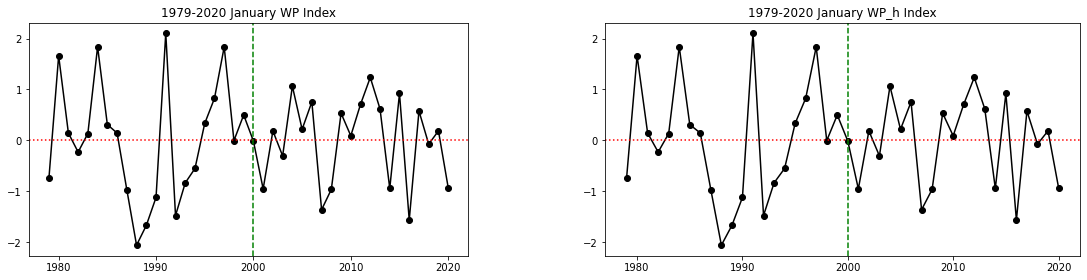

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
#创建Figure
fig = plt.figure(figsize=(10, 8))
#创建Axes
ax1 =fig.add_axes([0.05, 0.75, 0.61, 0.405])
#绘制折线图
ax1.plot(range(1979,2020+1,1),WP_nor, 'ko-')
#添加图题
ax1.set_title('1979-2020 January WP Index')
#添加y=0值水平参考线
ax1.axhline(0,ls=':',c='r')
#添加x=1990垂直参考线
ax1.axvline(2000,ls='--',c='g')

ax2 =fig.add_axes([0.85, 0.75, 0.66, 0.405])
#绘制折线图
ax2.plot(range(1979,2020+1,1),WP_h_nor, 'ko-')
#添加图题
ax2.set_title('1979-2020 January WP_h Index')
#添加y=0值水平参考线
ax2.axhline(0,ls=':',c='r')
#添加x=1990垂直参考线
ax2.axvline(2000,ls='--',c='g')
plt.show()

Text(0.5, 1.0, '1979-2020 January WP_h Index')

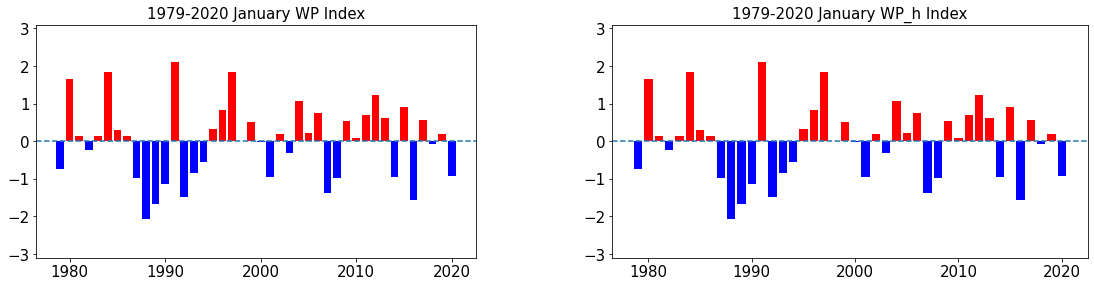

In [15]:
def bar_map(fig_ax,size,data_pc,start_year,end_year):
    c_color=[]#条形图颜色：红+，蓝-
    for i in range(start_year,end_year+1):
        if data_pc[i-start_year] >0:
              c_color.append('red')
        elif data_pc[i-start_year]<=0:
              c_color.append('blue')
    #设置标题
    #fig_ax.set_title('1979-2020 January WP Index',fontsize =size)
    
    #设置轴范围
    fig_ax.set_ylim(-3.1,3.1)
    # y=0设置为虚线
    fig_ax.axhline(0,linestyle="--")
    #设置刻度值大小
    plt.xticks(size=size)
    plt.yticks(size = size)
    #绘制条形图
    fig_ax.bar(range(start_year,end_year+1),data_pc,color=c_color)
fig = plt.figure(figsize=(10, 8))
#创建Axes
ax1 =fig.add_axes([0.05, 0.75, 0.61, 0.405])
bar_map(ax1,15,WP_nor,1979,2020)
ax1.set_title('1979-2020 January WP Index',fontsize =15)

ax2 =fig.add_axes([0.85, 0.75, 0.66, 0.405])
bar_map(ax2,15,WP_h_nor,1979,2020)
ax2.set_title('1979-2020 January WP_h Index',fontsize =15)

In [16]:
air

<xarray.DataArray 'air' (time: 42, lat: 94, lon: 192)>
[758016 values with dtype=float32]
Coordinates:
    level    float32 2.0
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1979-01-01 1980-01-01 ... 2020-01-01
Attributes:
    long_name:      Monthly Mean of Forecast of Air temperature at 2 m
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     2 m
    statistic:      Mean
    parent_stat:    Individual Obs
    standard_name:  air_temperature
    cell_methods:   time: mean (interval: 6 hours to daily) time: mean (inter...
    valid_range:    [120. 430.]
    actual_range:   [197.63 313.76]

## 500hPa去趋势

In [17]:
from scipy.signal import detrend #去趋势函数
det_z_500=np.zeros(shape=(42,73,144))
for i in range(73):
      for j in range(144):
                 det_z_500[:,i,j]=detrend(z_500[:,i,j])
                  
det_air=np.zeros(shape=(42,94,192))
for i in range(92):
      for j in range(192):
                 det_air[:,i,j]=detrend(air[:,i,j])
det_air

array([[[-3.96266174, -3.96156311, -3.92871094, ..., -3.85838318,
         -3.93489075, -3.92582703],
        [-2.82899475, -3.00509644, -3.13739014, ..., -2.53118896,
         -2.63085938, -2.76208496],
        [-1.79727173, -1.93438721, -2.05404663, ..., -1.65776062,
         -1.67459106, -1.74555969],
        ...,
        [ 2.06213379,  2.00984192,  1.99656677, ...,  2.31103516,
          2.22653198,  2.13369751],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 6.05151367,  6.10569763,  5.83695984, ...,  5.83332825,
          6.06768799,  6.08843994],
        [ 4.45681763,  4.49116516,  4.54670715, ...,  4.57102966,
          4.5193634 ,  4.4369812 ],
        [ 4.12471008,  4.08470154,  3.972229  , ...,  4.33947754,
          4.32817078,  4.25190735],
        ...,
        [-0.47703552, -0.37931824, -0.27210999, ..., -

In [19]:
s1=detrend(air,axis=0,type='linear',bp=0, overwrite_data=False)
s1

array([[[-3.9626617 , -3.961563  , -3.928711  , ..., -3.8583832 ,
         -3.9348907 , -3.925827  ],
        [-2.8290253 , -3.0050964 , -3.1374054 , ..., -2.531189  ,
         -2.6308594 , -2.762085  ],
        [-1.7972717 , -1.9343567 , -2.0540466 , ..., -1.6577606 ,
         -1.6745911 , -1.7455597 ],
        ...,
        [ 2.0621338 ,  2.009842  ,  1.9966125 , ...,  2.3110352 ,
          2.226532  ,  2.133728  ],
        [ 1.5830078 ,  1.6107025 ,  1.6335297 , ...,  1.5108337 ,
          1.5179901 ,  1.5697021 ],
        [ 0.34820557,  0.3282318 ,  0.33033752, ...,  0.31962585,
          0.32789612,  0.33840942]],

       [[ 6.0515137 ,  6.1056976 ,  5.83696   , ...,  5.8333282 ,
          6.067688  ,  6.08844   ],
        [ 4.456787  ,  4.491165  ,  4.546692  , ...,  4.5710297 ,
          4.5193634 ,  4.436981  ],
        [ 4.12471   ,  4.084732  ,  3.972229  , ...,  4.3394775 ,
          4.328171  ,  4.2519073 ],
        ...,
        [-0.47703552, -0.37931824, -0.2720642 , ..., -

## WP与500hPa场的相关系数 r

In [20]:
from scipy.stats import pearsonr
r=np.zeros(shape=(73,144))
p=np.zeros(shape=(73,144))
sum=0.0
for i in range(73):
      for j in range(144):
            r[i,j],p[i,j]=pearsonr(WP_nor,det_z_500[:,i,j])
            if abs(p[i,j])>=0.01:
                   r[i,j]=np.NaN
                  

## WP与同期中国气温相关系数 r_t

In [21]:
from scipy.stats import pearsonr
r_t=np.zeros(shape=(94,192))
p_t=np.zeros(shape=(94,192))
test_r_t=np.zeros(shape=(94,192))
sum=0.0
for i in range(94):
      for j in range(192):
            r_t[i,j],p_t[i,j]=pearsonr(WP_nor,det_air[:,i,j])
            if abs(p_t[i,j])>=0.1:
                    test_r_t[i,j]=np.NaN
            else:
                    test_r_t[i,j]=r_t[i,j]

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [22]:
r_t

array([[ 0.18356748,  0.19055271,  0.17788782, ...,  0.18919194,
         0.19285581,  0.18975662],
       [ 0.16716386,  0.16746317,  0.17021731, ...,  0.16007053,
         0.15983434,  0.16652692],
       [ 0.14494644,  0.1518314 ,  0.14920336, ...,  0.15571485,
         0.15763091,  0.15678872],
       ...,
       [-0.0470583 , -0.0490426 , -0.04925754, ..., -0.04140133,
        -0.04437602, -0.04743941],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

## 绘图 WP与500hPa，WP--pc序列

PROJ: proj_create_from_database: Cannot find proj.db


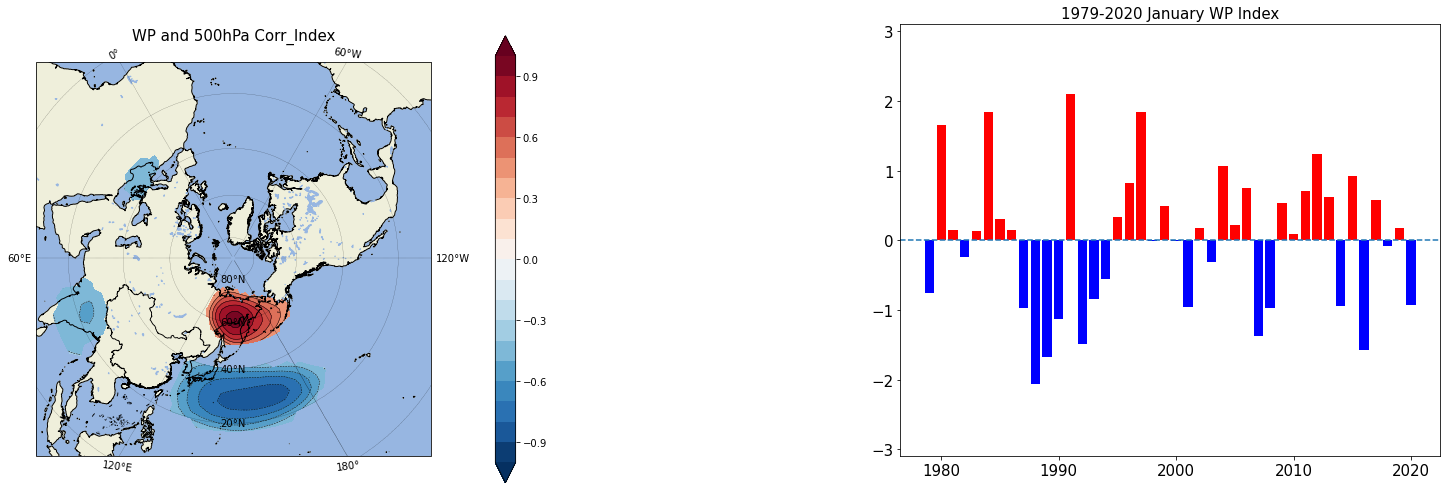

In [23]:
import matplotlib.path as mpath
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader

proj =ccrs.NorthPolarStereo(central_longitude=150)
leftlon, rightlon, lowerlat, upperlat = (-180,180,10,90)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
#画布
fig1 = plt.figure(figsize=(15,15))
f1_ax1 = fig1.add_axes([0.05, 0.75, 0.5, 0.505],projection = proj)
#注意此处添加了projection = ccrs.NorthPolarStereo()北半球极地投影                      
f1_ax1.set_extent(img_extent, ccrs.PlateCarree())
#通过圆柱投影的范围限制地图范围，这样设置地图参数较为方便                       
f1_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
f1_ax1.add_feature(cfeature.OCEAN.with_scale('50m'))#海洋
f1_ax1.add_feature(cfeature.LAND.with_scale('50m'))#陆地
f1_ax1.add_feature(cfeature.LAKES.with_scale('50m'))#湖泊
#填色
ax_colorbar = f1_ax1.contourf(z.lon,z.lat,r,levels =np.arange(-1,1.001,0.1) , extend = 'both',transform=ccrs.PlateCarree(),cmap='RdBu_r')
f1_ax1.contour(z.lon,z.lat,r,levels =np.arange(-1,1.001,0.1),linewidths=0.5,colors='black',transform=ccrs.PlateCarree())
f1_ax1.add_geometries(Reader(r'D:\data\china_map\china1.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='black',linewidth=0.9)#详细国界中国国界
#绘制填色，需要说明的是：虽然是极地投影，但是我们的数据仍是按圆柱投影计算的，
#所以数据的坐标转换仍为transform=ccrs.PlateCarree()
#色标
plt.colorbar(ax_colorbar, shrink=0.82, pad=0.12)
#经纬网
gl = f1_ax1.gridlines(draw_labels=True, linewidth=0.2, color='k', alpha=0.9, linestyle='--')
#标题
f1_ax1.set_title('WP and 500hPa Corr_Index',fontsize =15)
# 调节字体大小
gl.xlabel_style={'size':10}
gl.ylabel_style={'size':10}
#WP--条形图
ax2 =fig1.add_axes([0.85, 0.82, 0.5, 0.4])
bar_map(ax2,15,WP_h_nor,1979,2020)
ax2.set_title('1979-2020 January WP Index',fontsize =15)
plt.show()

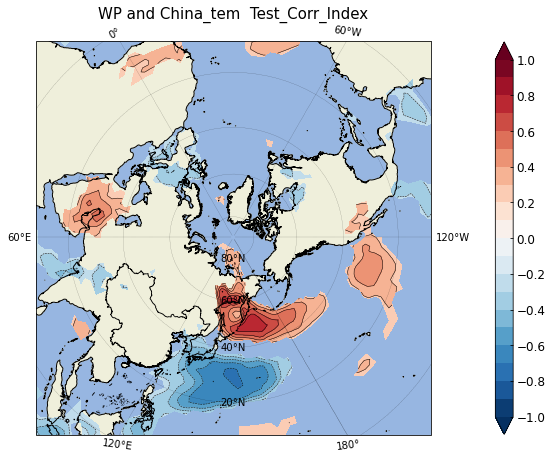

In [24]:
import matplotlib.path as mpath
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.util import add_cyclic_point  #循环
import matplotlib
lat = np.array(air['lat'])
lon = np.array(air["lon"])
ct, cycle_lon = add_cyclic_point(test_r_t, coord=lon)
LON, LAT = np.meshgrid(cycle_lon, lat)
leftlon, rightlon, lowerlat, upperlat = (-180,180,10,90)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
proj=ccrs.NorthPolarStereo(central_longitude=150)
#画布
fig1 = plt.figure(figsize=(15,15))
f1_ax1 = fig1.add_axes([0.05, 0.75, 0.5, 0.505],projection = proj)
#注意此处添加了projection = ccrs.NorthPolarStereo()北半球极地投影                      
f1_ax1.set_extent(img_extent, ccrs.PlateCarree())
f1_ax1.add_feature(cfeature.LAND, facecolor='lightgray')
#通过圆柱投影的范围限制地图范围，这样设置地图参数较为方便                       
f1_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
f1_ax1.add_feature(cfeature.OCEAN.with_scale('50m'))#海洋
f1_ax1.add_feature(cfeature.LAND.with_scale('50m'))#陆地
#f1_ax1.add_feature(cfeature.LAKES.with_scale('50m'))#湖泊
f1_ax1.add_geometries(Reader(r'D:\data\china_map\china1.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='black',linewidth=0.9)#详细国界中国国界
#填色
ax_colorbar = f1_ax1.contourf(LON, LAT, ct, levels=np.arange(-1,1.1,0.1), extend = 'both',transform=ccrs.PlateCarree(),cmap='RdBu_r')
f1_ax1.contour(LON, LAT, ct,levels =np.arange(-1,1.1,0.1),linewidths=0.5,colors='black',transform=ccrs.PlateCarree())
#绘制填色，需要说明的是：虽然是极地投影，但是我们的数据仍是按圆柱投影计算的，
#所以数据的坐标转换仍为transform=ccrs.PlateCarree()
#色标
cbar=plt.colorbar(ax_colorbar, shrink=0.72, pad=0.12)
cbar.set_ticks(np.arange(-1,1.001,0.2)) #设置colorbar范围和刻度标记间隔
cbar.ax.tick_params(labelsize=12, direction='in')
#经纬网
gl = f1_ax1.gridlines(draw_labels=True, linewidth=0.2, color='k', alpha=0.7, linestyle='--')
#gl.top_labels = True
#gl.right_labels = True
#标题
f1_ax1.set_title('WP and China_tem  Test_Corr_Index',fontsize =15)
# 调节字体大小
gl.xlabel_style={'size':10}
gl.ylabel_style={'size':10}

## 绘图 WP与 我国同期气温相关

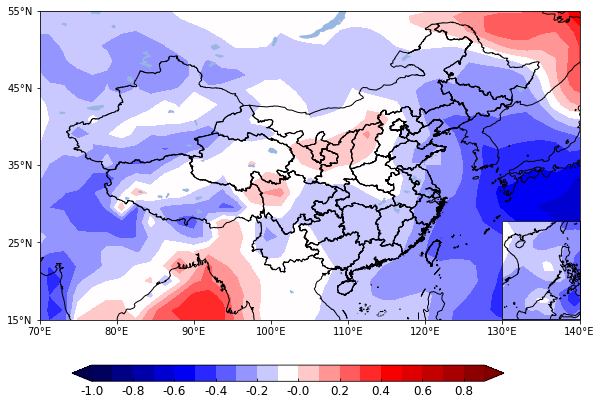

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.mpl.ticker as cticker
import cartopy.io.shapereader as shpreader
from cartopy.mpl.patch import geos_to_path
from matplotlib.path import Path
import xarray as x
import maskout
import maskout31
fig = plt.figure(figsize=(15,15))
proj = ccrs.PlateCarree()
leftlon, rightlon, lowerlat, upperlat = (70,140,15,55)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

#绘制填色图
fig_ax1 =fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
fig_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
fig_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
fig_ax1.add_feature(cfeature.OCEAN.with_scale('50m'))#海洋
fig_ax1.add_feature(cfeature.LAND.with_scale('50m'))#陆地
fig_ax1.add_feature(cfeature.LAKES.with_scale('50m'))#湖泊
fig_ax1.set_xticks(np.arange(leftlon,rightlon+10,10), crs=ccrs.PlateCarree())
fig_ax1.set_yticks(np.arange(lowerlat,upperlat+10,10), crs=ccrs.PlateCarree())
fig_ax1.xaxis.set_major_formatter(lon_formatter)
fig_ax1.yaxis.set_major_formatter(lat_formatter)

china = shpreader.Reader(r"D:\data\china_map\china2.shp").geometries()
fig_ax1.add_geometries(china, ccrs.PlateCarree(),facecolor='none', edgecolor='black')
c1=fig_ax1.contourf(air.lon,air.lat, r_t, levels=np.arange(-1,1,0.1), zorder=0, extend = 'both',transform=ccrs.PlateCarree(), cmap='seismic')
#clip1=maskout31.shp2clip(c1,fig_ax1,r"D:\data\china_map\china0.shp")
#clip=maskout.shp2clip(c1,fig_ax1,r"D:\data\china_map\country1.shp",'China')
#clip1=maskout31.shp2clip(c1,fig_ax1,r"D:\data\china_map\china0.shp")

#海南岛
fig_ax33 = fig.add_axes([0.528, 0.778, 0.072, 0.15],projection =ccrs.PlateCarree() )
fig_ax33.set_extent([105, 125, 0, 25], crs=ccrs.PlateCarree())
fig_ax33.add_feature(cfeature.COASTLINE.with_scale('50m'))
#china = shpreader.Reader(r"D:\data\china_map\bou2_4l.dbf").geometries()
fig_ax33.add_geometries(china, ccrs.PlateCarree(),facecolor='none', edgecolor='black',zorder = 1)
c2=fig_ax33.contourf(air.lon,air.lat, r_t, levels=np.arange(-1,1,0.1), zorder=0, extend = 'both',transform=ccrs.PlateCarree(), cmap='seismic')
#clip1=maskout31.shp2clip(c2,fig_ax33,r"D:\data\china_map\china0.shp")


#色

cbposition=fig.add_axes([0.13, 0.75, 0.4, 0.015])
cbar=fig.colorbar(c1,cax=cbposition,orientation='horizontal',format='%.1f')
#cbar.set_ticks(np.arange(-1,1.5,0.2)) #设置colorbar范围和刻度标记间隔
cbar.ax.tick_params(labelsize=12, direction='in')

plt.show()

## 南海

In [26]:
h_air= tem.air.loc[tem.time.dt.month.isin([1])].loc['1979-01-01':'2020-02-01',2.0,27:0,104:122]
h_air

<xarray.DataArray 'air' (time: 42, lat: 14, lon: 10)>
array([[[281.47998, 280.71   , ..., 286.51   , 289.26   ],
        [284.63   , 284.07   , ..., 291.07   , 293.05   ],
        ...,
        [299.4    , 299.88   , ..., 300.5    , 301.45   ],
        [299.82   , 300.39   , ..., 300.37   , 300.99   ]],

       [[280.69   , 280.13   , ..., 285.36   , 288.26   ],
        [284.53   , 283.95   , ..., 289.86   , 291.88   ],
        ...,
        [299.51   , 300.11   , ..., 300.34998, 301.22   ],
        [299.96   , 300.52002, ..., 300.34998, 300.88   ]],

       ...,

       [[280.69   , 279.26   , ..., 287.32   , 290.25   ],
        [284.46   , 283.87   , ..., 292.39   , 294.33002],
        ...,
        [300.28   , 301.     , ..., 300.57   , 301.64   ],
        [300.7    , 301.53   , ..., 300.39   , 301.07   ]],

       [[283.15   , 283.15   , ..., 287.43   , 290.5    ],
        [286.3    , 286.37   , ..., 292.15   , 294.06   ],
        ...,
        [299.72998, 300.34998, ..., 300.47   , 301.47   ],
        [300.11   , 300.78   , ..., 300.53   , 301.21   ]]], dtype=float32)
Coordinates:
    level    float32 2.0
  * lat      (lat) float32 25.71 23.81 21.9 20.0 ... 6.667 4.762 2.857 0.9524
  * lon      (lon) float32 105.0 106.9 108.8 110.6 ... 116.2 118.1 120.0 121.9
  * time     (time) datetime64[ns] 1979-01-01 1980-01-01 ... 2020-01-01
Attributes:
    long_name:      Monthly Mean of Forecast of Air temperature at 2 m
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     2 m
    statistic:      Mean
    parent_stat:    Individual Obs
    standard_name:  air_temperature
    cell_methods:   time: mean (interval: 6 hours to daily) time: mean (inter...
    valid_range:    [120. 430.]
    actual_range:   [197.63 313.76]

In [27]:
from scipy.stats import pearsonr
h_r=np.zeros(shape=(14,10))
h_p=np.zeros(shape=(14,10))
sum=0.0
for i in range(13):
      for j in range(9):
            h_r[i,j],h_p[i,j]=pearsonr(WP_nor,np.array(h_air[:,i,j]))

                  

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import xarray as xr
import maskout31
import maskout
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from matplotlib import rcParams
import cartopy.mpl.ticker as cticker 
#底图

def c_map(ax,img_extent,spec,a):           
        proj=ccrs.PlateCarree()
        ax.set_extent(img_extent,crs = proj)
        if a==1:
            ax.set_xticks(np.arange(img_extent[0], img_extent[1] + spec, spec), crs = proj)
            ax.set_yticks(np.arange(img_extent[2], img_extent[3] + spec, spec),crs = proj)
            lon_formatter = cticker.LongitudeFormatter()
            lat_formatter = cticker.LatitudeFormatter()
            ax.xaxis.set_major_formatter(lon_formatter)
            ax.yaxis.set_major_formatter(lat_formatter)
        else:
            
            pass

        ax.add_feature(cfeature.OCEAN.with_scale('50m'))#海洋
        ax.add_feature(cfeature.LAND.with_scale('50m'))#陆地
        ax.add_feature(cfeature.LAKES.with_scale('50m'))#湖泊
                           
        ax.add_geometries(Reader(r'D:\data\china_map\river1.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='b',linewidth=0.4)#长江黄河
        ax.add_geometries(Reader(r'D:\data\china_map\china1.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.5)#详细国界中国国界
        ax.add_geometries(Reader(r'D:\data\china_map\china2.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.35)#省界
        ax.add_geometries(Reader(r'D:\data\china_map\ne_10m_land.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.2)#海岸线
        ax.add_geometries(Reader(r'D:\data\china_map\ne_50m_lakes.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.2)#湖泊
        #ax.add_geometries(Reader(r"D:\data\china_map\china0").geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.2)#简单国界
        ax.add_geometries(Reader(r"D:\data\china_map\country1.shp").geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.1)


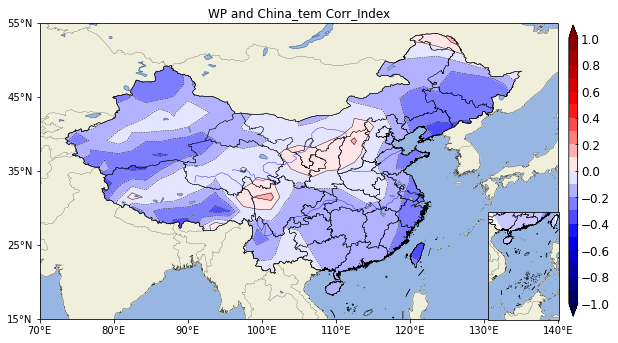

In [29]:
leftlon, rightlon, lowerlat, upperlat = (70, 140, 15, 55)
img_extent = [leftlon, rightlon, lowerlat, upperlat] 
fig=plt.figure(figsize = [15, 15])
proj=ccrs.PlateCarree()
ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
#填色
c11=ax1.contourf(air.lon,air.lat, r_t, levels=np.arange(-1,1.1,0.1),extend='both',transform=ccrs.PlateCarree(),cmap='seismic')
c12=ax1.contour(c11,levels=np.arange(-1,1.1,0.1),transform=ccrs.PlateCarree(),colors='k',linewidths=0.45)
#裁剪
clip1=maskout31.shp2clip(c11,ax1,r"D:\data\china_map\china0.shp")
clip11=maskout31.shp2clip(c12,ax1,r"D:\data\china_map\china0.shp")
#ax.clabel(c12)值
#底图
c_map(ax1,img_extent,10,1)
#色标
cbar=plt.colorbar(c11,shrink=0.9,aspect=30,fraction=0.02,pad=0.02) #aspect控制bar宽度，fraction控制大小比例,pad控制与图的距离
cbar.set_ticks(np.arange(-1,1.2,0.2)) #设置colorbar范围和刻度标记间隔
cbar.ax.tick_params(labelsize=12, direction='in')
#标题
ax1.set_title('WP and China_tem Corr_Index') 
#ax.outline_patch.set_linewidth(1)#绘图边框

#添加南海
ax2 = fig.add_axes([0.448, 0.812, 0.20, 0.10],projection=proj)
ax2.set_extent([105.8, 122,0,25])
#填色
c21=ax2.contourf(h_air.lon,h_air.lat, h_r, levels=np.arange(-1,1,0.1),extend='both',transform=ccrs.PlateCarree(),cmap='seismic')
#底图
c_map(ax2,[105, 122,0,26],10,0)
#裁剪
clip2=maskout31.shp2clip(c21,ax2,r"D:\data\china_map\china0.shp")

plt.show()

# EU

In [30]:
z_55_20=z_500.loc[:,55,20]
z_55_75=z_500.loc[:,55,75]
z_40_145=z_500.loc[:,40,145]
z_55_20

<xarray.DataArray 'hgt' (time: 42)>
array([5336., 5373., 5330., 5381., 5376., 5308., 5273., 5269., 5311., 5436.,
       5547., 5449., 5470., 5511., 5403., 5332., 5362., 5521., 5499., 5414.,
       5401., 5380., 5433., 5463., 5357., 5280., 5356., 5540., 5329., 5441.,
       5394., 5375., 5393., 5343., 5360., 5408., 5361., 5340., 5445., 5396.,
       5307., 5515.], dtype=float32)
Coordinates:
    level    float32 500.0
    lat      float32 55.0
    lon      float32 20.0
  * time     (time) datetime64[ns] 1979-01-01 1980-01-01 ... 2020-01-01
Attributes:
    long_name:      Monthly Geopotential Heights on Pressure Levels
    units:          m
    precision:      0
    GRIB_id:        7
    GRIB_name:      HGT
    var_desc:       Geopotential height
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Individual Obs
    parent_stat:    Other
    standard_name:  geopotential_height
    cell_methods:   time: mean (montly from 6-hourly values)
    valid_range:    [-1500. 35800.]
    actual_range:   [ -347. 32301.]

In [31]:
from scipy.signal import detrend #去趋势函数
z_1=detrend(z_55_20)
z_2=detrend(z_55_75)
z_3=detrend(z_40_145)
z_3

array([ 5.02871094e+01,  1.10156250e+00, -7.90844727e+01,  1.77294922e+01,
        2.65439453e+01, -6.06420898e+01, -5.58281250e+01, -5.00136719e+01,
        2.80029297e+00,  3.76142578e+01,  1.12428711e+02,  1.62426758e+01,
       -3.94335938e+00,  4.28710938e+01,  6.66850586e+01,  2.49951172e+00,
       -2.76865234e+01, -2.38725586e+01, -2.90581055e+01, -3.24414062e+00,
       -3.04301758e+01,  7.33842773e+01, -4.18017578e+01,  4.01220703e+00,
       -1.51733398e+01, -3.13593750e+01, -2.55454102e+01, -1.97309570e+01,
        6.10830078e+01, -1.03027344e-01,  6.27114258e+01, -8.47460938e+00,
       -8.66606445e+01, -3.88461914e+01, -2.20322266e+01,  1.78173828e+00,
        1.95961914e+01,  1.94101562e+01, -1.57758789e+01, -1.09614258e+01,
       -1.21474609e+01,  7.36665039e+01], dtype=float32)

In [32]:
EU=-z_1/4.+z_2/2.-z_3/4.
EU_nor=(EU-EU.mean())/(EU.std())#标准化
EU_nor

array([-0.30017018,  0.01470388,  1.4133197 , -0.09602476,  0.11096528,
        1.6665081 ,  1.1869658 ,  1.4429892 ,  0.07585556, -0.27618745,
       -2.3053393 , -1.0096964 , -1.2489563 , -1.1498504 , -0.8349739 ,
        0.46556795,  1.2119806 , -0.89073086, -1.5909475 ,  0.38632384,
        0.1715878 , -0.45998013, -0.5472169 , -0.6540689 ,  0.371859  ,
        1.4664428 ,  0.37882206, -1.9641742 ,  0.59665173,  0.3083584 ,
       -0.1908016 ,  0.2515694 ,  1.4099028 ,  1.3618942 , -0.57898635,
       -0.8917964 , -0.25817883,  1.267941  , -0.29044157,  0.8973124 ,
        0.70219165, -1.6211917 ], dtype=float32)

In [33]:
from scipy.stats import pearsonr
EU_r=np.zeros(shape=(73,144))
EU_p=np.zeros(shape=(73,144))
for i in range(73):
      for j in range(144):
            EU_r[i,j],EU_p[i,j]=pearsonr(EU_nor,(z_500[:,i,j]))
            if abs(EU_p[i,j])>=0.01:
                   EU_r[i,j]=np.NaN
                  

In [34]:
z

<xarray.Dataset>
Dimensions:  (level: 17, lat: 73, lon: 144, time: 519)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-03-01
Data variables:
    hgt      (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    source_url:     http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history:        created 2002/03 by Hoop (netCDF2.3)\nConverted to chunked...

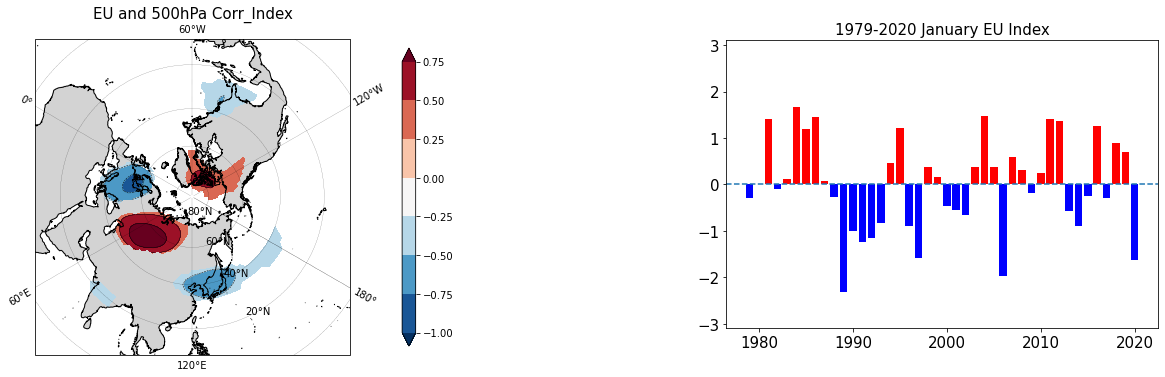

In [35]:
import matplotlib.path as mpath
import cartopy.feature as cfeature
import cartopy.crs as ccrs
proj =ccrs.NorthPolarStereo(central_longitude=120)
leftlon, rightlon, lowerlat, upperlat = (-180,180,10,90)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
fig1 = plt.figure(figsize=(12,10))
f1_ax1 = fig1.add_axes([0.05, 0.75, 0.5, 0.505],projection = proj)
#注意此处添加了projection = ccrs.NorthPolarStereo()北半球极地投影
f1_ax1.set_extent(img_extent, ccrs.PlateCarree())
#通过圆柱投影的范围限制地图范围，这样设置地图参数较为方便
f1_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
f1_ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax_colorbar = f1_ax1.contourf(z.lon,z.lat,EU_r,levels =np.arange(-1.,1.,0.25) , extend = 'both',transform=ccrs.PlateCarree(),cmap='RdBu_r')
f1_ax1.contour(z.lon,z.lat,EU_r,levels =np.arange(-1.,1.,0.25),linewidths=0.5,colors='black',transform=ccrs.PlateCarree())
plt.colorbar(ax_colorbar, shrink=0.82, pad=0.12)#,orientation='horizontal')
gl = f1_ax1.gridlines(draw_labels=True, linewidth=0.2, color='k', alpha=0.9, linestyle='--')
f1_ax1.set_title('EU and 500hPa Corr_Index',fontsize =15)
# 调节字体大小
gl.xlabel_style={'size':10}
gl.ylabel_style={'size':10}
#绘制填色，需要说明的是：虽然是极地投影，但是我们的数据仍是按圆柱投影计算的，所以数据的坐标转换仍为transform=ccrs.PlateCarree()

ax2 =fig1.add_axes([0.85, 0.82, 0.5, 0.4])
bar_map(ax2,15,EU_nor,1979,2020)
ax2.set_title('1979-2020 January EU Index',fontsize =15)
plt.show()

In [36]:
EU_r_tem=np.zeros(shape=(94,192))
EU_p_tem=np.zeros(shape=(94,192))
for i in range(94):
      for j in range(192):
            EU_r_tem[i,j],EU_p_tem[i,j]=pearsonr(EU_nor,air[:,i,j])
            #if abs(EU_p_tem[i,j])>0.1:
                   # EU_r_tem[i,j]=np.NaN
                

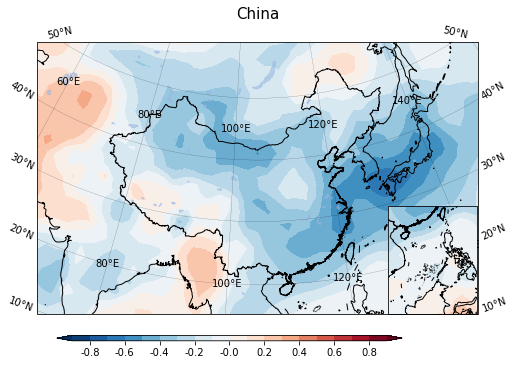

In [37]:
data=air
#建立画布(这部分没啥好说的，跳过)
proj = ccrs.LambertConformal(central_latitude=90, central_longitude=105)
fig2, f2_ax1 = plt.subplots(figsize=(12, 5), subplot_kw=dict(projection=proj))
#fig2 = plt.figure(figsize=(15,15))
#proj = ccrs.PlateCarree(central_longitude=105) 
leftlon, rightlon, lowerlat, upperlat = (70,140,15,55)#(70,140,15,55)
#绘制地图
#f2_ax1 = fig2.add_axes([0.1, 0.1, 0.5, 0.3],projection = proj)
#在画布的绝对坐标建立子图
f2_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
#海岸线，50m精度
f2_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
#湖泊数据(但是这个貌似只画了比较大的湖泊，比如贝湖巴湖)
f2_ax1.add_feature(cfeature.LAKES, alpha=0.5)
#以下6条语句是定义地理坐标标签格式
#f2_ax1.set_xticks(np.arange(leftlon,rightlon+10,10), crs=ccrs.PlateCarree())
#f2_ax1.set_yticks(np.arange(lowerlat,upperlat+10,10), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
f2_ax1.xaxis.set_major_formatter(lon_formatter)
f2_ax1.yaxis.set_major_formatter(lat_formatter)
f2_ax1.set_title('China',loc='center',fontsize =15)
#读取shp文件
china = shpreader.Reader(r"D:\data\china_map\china1.dbf").geometries()
#绘制中国国界省界九段线等等
f2_ax1.add_geometries(china, ccrs.PlateCarree(),facecolor='none', edgecolor='black',zorder = 1)
gl = f2_ax1.gridlines(draw_labels=True, linewidth=0.2, color='k', alpha=0.9, linestyle='--')
#gl.top_labels = False
#gl.right_labels = False
#添加南海，实际上就是新建一个子图覆盖在之前子图的右下角
f2_ax2 = fig2.add_axes([0.555, 0.1235, 0.32, 0.3],projection = proj)
f2_ax2.set_extent([105, 125, 0, 25], crs=ccrs.PlateCarree())
f2_ax2.add_feature(cfeature.COASTLINE.with_scale('50m'))
china = shpreader.Reader(r"D:\data\china_map\china1.dbf").geometries()
f2_ax2.add_geometries(china, ccrs.PlateCarree(),facecolor='none', edgecolor='black',zorder = 1)
c1=f2_ax1.contourf(data["lon"],data["lat"],EU_r_tem,extend = 'both',transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu_r, levels=np.arange(-0.9,1.0,0.1))
#f2_ax1.contour(data["lon"],data["lat"],r_tem,transform=ccrs.PlateCarree(),colors='black', levels=np.arange(-0.9,1.0,0.1))
f2_ax2.contourf(data["lon"],data["lat"],EU_r_tem,transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu_r, levels=np.arange(-0.9,1.0,0.1))

#色
cbposition=fig2.add_axes([0.28, 0.05, 0.4, 0.015])
fig.colorbar(c1,cax=cbposition,orientation='horizontal',format='%.1f',)
plt.show()

# 完整代码 EU

# 

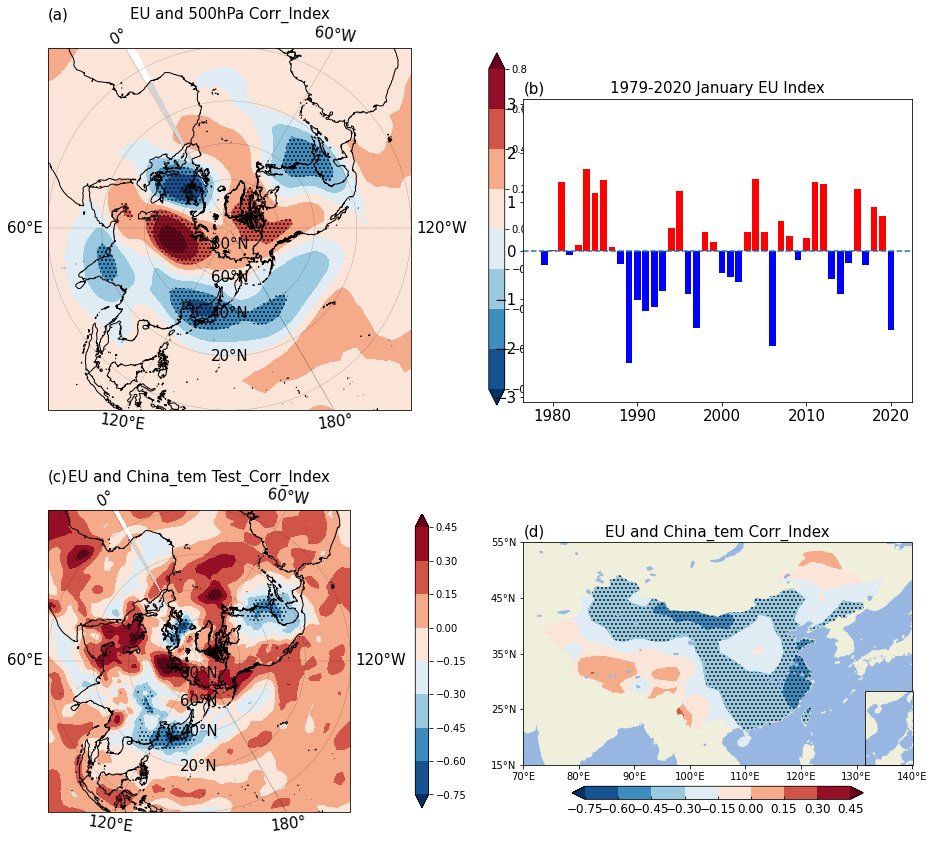

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import maskout31
from scipy.signal import detrend 
from scipy.stats import pearsonr
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import cartopy.mpl.ticker as cticker
tem=xr.open_dataset(r"D:\data\short_term_climate_class\sx03\air.2m.mon.mean.nc",drop_variables=["time_bnds"])
air= tem.air.loc[tem.time.dt.month.isin([1])].loc['1979-01-01':'2020-02-01',2.0]
z=xr.open_dataset(r"D:\data\short_term_climate_class\sx01\hgt.mon.mean.nc", drop_variables=["time_bnds"])
z_500= z.hgt.loc[z.time.dt.month.isin([1])].loc['1979-01-01':'2020-02-01', 500]
z_55_20=z_500.loc[:,55,20]
z_55_75=z_500.loc[:,55,75]
z_40_145=z_500.loc[:,40,145]
z_1=detrend(z_55_20,axis=0,type='linear')
z_2=detrend(z_55_75,axis=0,type='linear')
z_3=detrend(z_40_145,axis=0,type='linear')
det_air=detrend(air,axis=0,type='linear',overwrite_data=False)
det_z=detrend(z_500,axis=0,type='linear',overwrite_data=False)
EU=-z_1/4.+z_2/2.-z_3/4.
EU_nor=(EU-EU.mean())/(EU.std())
def cor(x,y,data_1,data_2 ):
        r=np.zeros(shape=(y,x))
        p=np.zeros(shape=(y,x))
        test_r=np.zeros(shape=(y,x))
        sum=0.0
        for i in range(y):
              for j in range(x):
                    r[i,j],p[i,j]=pearsonr(data_1,data_2[:,i,j])
                    if abs(p[i,j])>0.05:
                            test_r[i,j]=np.NaN
                    else:
                            test_r[i,j]=r[i,j]
        
        return r,p,test_r
def c_map(ax,img_extent,spec,a):           
        proj=ccrs.PlateCarree()
        ax.set_extent(img_extent,crs = proj)
        if a==1:
            ax.set_xticks(np.arange(img_extent[0], 
                                    img_extent[1] + spec, spec), crs = proj)
            ax.set_yticks(np.arange(img_extent[2], 
                                    img_extent[3] + spec, spec),crs = proj)
            lon_formatter = cticker.LongitudeFormatter()
            lat_formatter = cticker.LatitudeFormatter()
            ax.xaxis.set_major_formatter(lon_formatter)
            ax.yaxis.set_major_formatter(lat_formatter)
        else:
            
            pass

        ax.add_feature(cfeature.OCEAN.with_scale('50m'))#海洋
        ax.add_feature(cfeature.LAND.with_scale('50m'))#陆地
        ax.add_feature(cfeature.LAKES.with_scale('50m'))#湖泊                        
        #ax.add_geometries(Reader(r"D:\data\china_map\country1.shp").geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.1)
r,p,test_r=cor(144,73,EU_nor,det_z)
r_t,p_t,test_r_t=cor(192,94,EU_nor,det_air)
def bar_map(fig_ax,size,data_pc,start_year,end_year):
    c_color=[]
    for i in range(start_year,end_year+1):
        if data_pc[i-start_year] >0:
              c_color.append('red')
        elif data_pc[i-start_year]<=0:
              c_color.append('blue')
    fig_ax.set_ylim(-3.1,3.1)
    fig_ax.axhline(0,linestyle="--")
    plt.xticks(size=size)
    plt.yticks(size = size)
    fig_ax.bar(range(start_year,end_year+1),data_pc,color=c_color)
def NPS_map(ax,extent):
    ax.set_extent(extent, ccrs.PlateCarree())       
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
   # ax.add_geometries(Reader(r'D:\data\china_map\country1.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='black',linewidth=0.5)
    gl = ax.gridlines(draw_labels=True, linewidth=0.2, color='k', alpha=0.85, linestyle='--')
    gl.xlabel_style={'size':15}
    gl.ylabel_style={'size':15}
proj =ccrs.NorthPolarStereo(central_longitude=150)
leftlon, rightlon, lowerlat, upperlat = (-180,180,0,90)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
fig = plt.figure(figsize=(12,12))

f_ax1 = fig.add_axes([0.05, 0.75, 0.6, 0.6],projection = proj)                  
NPS_map(f_ax1,img_extent)
ax_colorbar=f_ax1.contourf(z.lon,z.lat,r,levels =10,extend = 'both',transform=ccrs.PlateCarree(),cmap='RdBu_r')
f_ax1.contourf(z.lon,z.lat,p, [0,0.01,1],zorder=1,hatches=['...', None],colors="none", transform=ccrs.PlateCarree())
#f_ax1.contour(ax_colorbar,levels =np.arange(-1,1.001,0.1),linewidths=0.5,colors='black',transform=ccrs.PlateCarree())
plt.colorbar(ax_colorbar, shrink=0.68, pad=0.15)
f_ax1.set_title('EU and 500hPa Corr_Index',fontsize =15)
f_ax1.set_title('(a)', loc='left', fontsize=15)

f_ax2 =fig.add_axes([0.6, 0.85, 0.45, 0.35])
bar_map(f_ax2,15,EU_nor,1979,2020)
f_ax2.set_title('1979-2020 January EU Index',fontsize =15)
f_ax2.set_title('(b)', loc='left', fontsize=15)

f_ax3 = fig.add_axes([0.05, 0.3, 0.5, 0.5],projection = proj)                     
NPS_map(f_ax3,img_extent)
ax3_colorbar=f_ax3.contourf(air.lon,air.lat,r_t,levels =10,extend = 'both',transform=ccrs.PlateCarree(),cmap='RdBu_r')
f_ax3.contourf(air.lon,air.lat,p_t, [0,0.01,1],zorder=1,hatches=['...', None],colors="none", transform=ccrs.PlateCarree())
#f_ax3.contour(ax3_colorbar,levels =np.arange(-1,1.001,0.1),linewidths=0.5,colors='black',transform=ccrs.PlateCarree())
plt.colorbar(ax3_colorbar, shrink=0.68, pad=0.15)
f_ax3.set_title('EU and China_tem Test_Corr_Index',fontsize =15)
f_ax3.set_title('(c)', loc='left', fontsize=15)

f_ax4 = fig.add_axes([0.6, 0.33, 0.45, 0.5],projection = ccrs.PlateCarree())
c11=f_ax4.contourf(air.lon,air.lat, r_t, levels=10,extend='both',transform=ccrs.PlateCarree(),cmap='RdBu_r')
#c12=f_ax4.contour(c11,levels=np.arange(-1,1.1,0.1),transform=ccrs.PlateCarree(),colors='k',linewidths=0.45)
cf2 = f_ax4.contourf(air.lon,air.lat,p_t,[np.min(p_t),0.05,np.max(p_t)],zorder=1,hatches=['...', None],colors="none", transform=ccrs.PlateCarree())
clip1=maskout31.shp2clip(c11,f_ax4,r"D:\data\china_map\china0.shp")
clip11=maskout31.shp2clip(cf2,f_ax4,r"D:\data\china_map\china0.shp")
c_map(f_ax4,[70, 140, 15, 55],10,1)
f_ax4.set_title('EU and China_tem Corr_Index',fontsize =15) 
f_ax4.set_title('(d)', loc='left', fontsize=15)
cbar=plt.colorbar(c11,shrink=0.75,orientation='horizontal',pad=0.05) 
cbar.ax.tick_params(labelsize=12, direction='in')
ax2 = fig.add_axes([0.838, 0.43, 0.37, 0.085],projection=ccrs.PlateCarree())
c_map(ax2,[105, 122,0,26],10,0)
#plt.savefig(r'D:\EU.jpg',dpi=300,bbox_inches='tight')
plt.show()

# 完整代码  WP

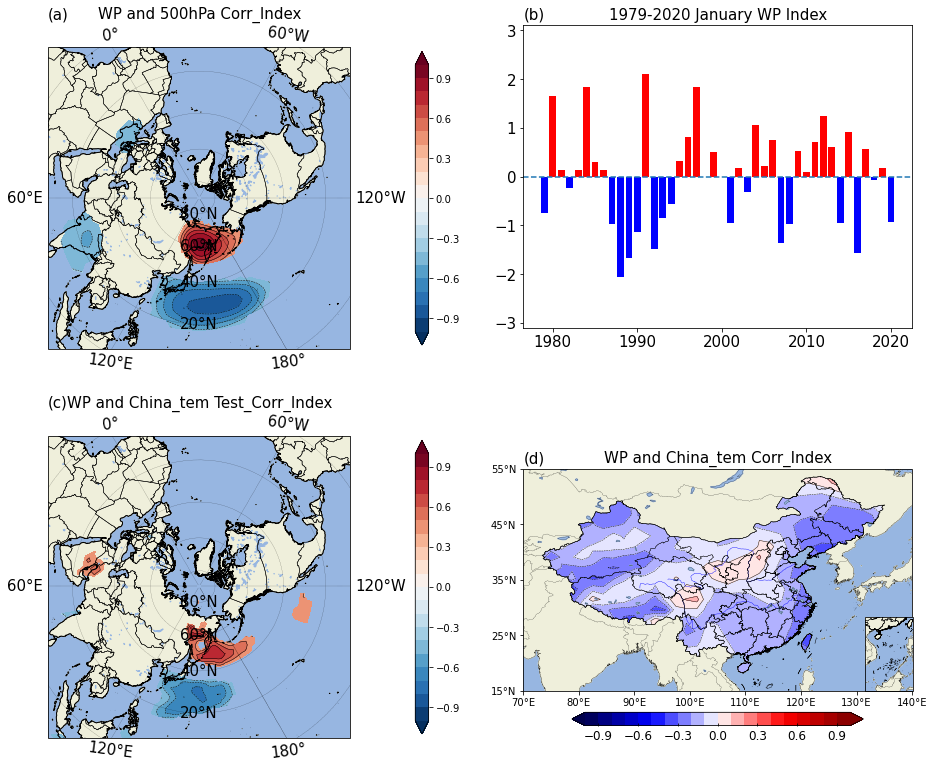

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import maskout31
from scipy.signal import detrend 
from scipy.stats import pearsonr
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import cartopy.mpl.ticker as cticker
#读取nc
tem=xr.open_dataset(r"D:\data\short_term_climate_class\sx03\air.2m.mon.mean.nc",
                    drop_variables=["time_bnds"])
air= tem.air.loc[tem.time.dt.month.isin([1])].loc['1979-01-01':'2020-02-01',2.0]
z=xr.open_dataset(r"D:\data\short_term_climate_class\sx01\hgt.mon.mean.nc", 
                  drop_variables=["time_bnds"])
z_500= z.hgt.loc[z.time.dt.month.isin([1])].loc['1979-01-01':'2020-02-01', 500]
z_60_155=z_500.loc[:,60,155]
z_30_155=z_500.loc[:,30,155]
#去趋势函数
z_1=detrend(z_60_155,axis=0,type='linear')
z_2=detrend(z_30_155,axis=0,type='linear')
det_air=detrend(air,axis=0,type='linear',overwrite_data=False)
det_z=detrend(z_500,axis=0,type='linear',overwrite_data=False)
#标准化
WP=(z_1-z_2)/2.
WP_nor=(WP-WP.mean())/(WP.std())
#求相关系数
def cor(x,y,data_1,data_2 ):
        r=np.zeros(shape=(y,x))
        p=np.zeros(shape=(y,x))
        test_r=np.zeros(shape=(y,x))
        sum=0.0
        for i in range(y):
              for j in range(x):
                    r[i,j],p[i,j]=pearsonr(data_1,data_2[:,i,j])
                    if abs(p[i,j])>=0.01:
                            test_r[i,j]=np.NaN
                    else:
                            test_r[i,j]=r[i,j]
        
        return r,test_r 
    
#填色底图
def c_map(ax,img_extent,spec,a):           
        proj=ccrs.PlateCarree()
        ax.set_extent(img_extent,crs = proj)
        if a==1:
            ax.set_xticks(np.arange(img_extent[0], 
                                    img_extent[1] + spec, spec), crs = proj)
            ax.set_yticks(np.arange(img_extent[2], 
                                    img_extent[3] + spec, spec),crs = proj)
            lon_formatter = cticker.LongitudeFormatter()
            lat_formatter = cticker.LatitudeFormatter()
            ax.xaxis.set_major_formatter(lon_formatter)
            ax.yaxis.set_major_formatter(lat_formatter)
        else:
            
            pass

        ax.add_feature(cfeature.OCEAN.with_scale('50m'))#海洋
        ax.add_feature(cfeature.LAND.with_scale('50m'))#陆地
        ax.add_feature(cfeature.LAKES.with_scale('50m'))#湖泊                        
        ax.add_geometries(Reader(r'D:\data\china_map\river1.shp').geometries(),
                          ccrs.PlateCarree(),facecolor='none',edgecolor='b',linewidth=0.4)#长江黄河
        ax.add_geometries(Reader(r'D:\data\china_map\china1.shp').geometries(),
                          ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.5)#详细国界中国国界
        ax.add_geometries(Reader(r'D:\data\china_map\china2.shp').geometries(),
                          ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.35)#省界
        ax.add_geometries(Reader(r'D:\data\china_map\ne_10m_land.shp').geometries(),
                          ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.2)#海岸线
        ax.add_geometries(Reader(r'D:\data\china_map\ne_50m_lakes.shp').geometries(),
                          ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.2)#湖泊
        #ax.add_geometries(Reader(r"D:\data\china_map\china0").geometries(),
            #ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.2)#简单国界
        ax.add_geometries(Reader(r"D:\data\china_map\country1.shp").geometries(),
                          ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.1)


#WP与500hPa的相关
r,test_r=cor(144,73,WP_nor,det_z)
#WP与中国同期气温的相关
r_t,test_r_t=cor(192,94,WP_nor,det_air)

#条形图底图
def bar_map(fig_ax,size,data_pc,start_year,end_year):
    c_color=[]
    for i in range(start_year,end_year+1):
        if data_pc[i-start_year] >0:
              c_color.append('red')
        elif data_pc[i-start_year]<=0:
              c_color.append('blue')
    #设置轴范围
    fig_ax.set_ylim(-3.1,3.1)
    # y=0设置为虚线
    fig_ax.axhline(0,linestyle="--")
    #设置刻度值大小
    plt.xticks(size=size)
    plt.yticks(size = size)
    #绘制条形图
    fig_ax.bar(range(start_year,end_year+1),data_pc,color=c_color)
    
#北半球极地投影底图
def NPS_map(ax,extent):
    ax.set_extent(extent, ccrs.PlateCarree())       
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'))#海岸线
    ax.add_feature(cfeature.OCEAN.with_scale('50m'))#海洋
    ax.add_feature(cfeature.LAND.with_scale('50m'))#陆地
    ax.add_feature(cfeature.LAKES.with_scale('50m'))#湖泊
    ax.add_geometries(Reader(r'D:\data\china_map\country1.shp').geometries(),
          ccrs.PlateCarree(),facecolor='none',edgecolor='black',linewidth=0.5)
    #经纬网
    gl = ax.gridlines(draw_labels=True, linewidth=0.2, color='k', alpha=0.85, linestyle='--')
    # 调节字体大小
    gl.xlabel_style={'size':15}
    gl.ylabel_style={'size':15}

proj =ccrs.NorthPolarStereo(central_longitude=150)
leftlon, rightlon, lowerlat, upperlat = (-180,180,10,90)
img_extent = [leftlon, rightlon, lowerlat, upperlat]

#画布
fig = plt.figure(figsize=(12,12))

#子图1
f_ax1 = fig.add_axes([0.05, 0.75, 0.5, 0.5],projection = proj)
#注意此处添加了projection = ccrs.NorthPolarStereo()北半球极地投影                      
NPS_map(f_ax1,img_extent)
#填色
ax_colorbar=f_ax1.contourf(z.lon,z.lat,test_r,levels =np.arange(-1,1.001,0.1),
                           extend = 'both',transform=ccrs.PlateCarree(),cmap='RdBu_r')
f_ax1.contour(ax_colorbar,levels =np.arange(-1,1.001,0.1),linewidths=0.5,
              colors='black',transform=ccrs.PlateCarree())
#绘制填色，需要说明的是：虽然是极地投影，但是我们的数据仍是按圆柱投影计算的，
#所以数据的坐标转换仍为transform=ccrs.PlateCarree()
#色标
plt.colorbar(ax_colorbar, shrink=0.68, pad=0.15)
#标题
f_ax1.set_title('WP and 500hPa Corr_Index',fontsize =15)
f_ax1.set_title('(a)', loc='left', fontsize=15)


#子图2
#WP--条形图
f_ax2 =fig.add_axes([0.6, 0.85, 0.45, 0.35])
bar_map(f_ax2,15,WP_nor,1979,2020)
f_ax2.set_title('1979-2020 January WP Index',fontsize =15)
f_ax2.set_title('(b)', loc='left', fontsize=15)


#子图3
f_ax3 = fig.add_axes([0.05, 0.3, 0.5, 0.5],projection = proj)
#注意此处添加了projection = ccrs.NorthPolarStereo()北半球极地投影                      
NPS_map(f_ax3,img_extent)
#填色
ax3_colorbar=f_ax3.contourf(air.lon,air.lat,test_r_t,levels =np.arange(-1,1.001,0.1),
                            extend = 'both',transform=ccrs.PlateCarree(),cmap='RdBu_r')
f_ax3.contour(ax3_colorbar,levels =np.arange(-1,1.001,0.1),linewidths=0.5,colors='black',
              transform=ccrs.PlateCarree())
plt.colorbar(ax3_colorbar, shrink=0.68, pad=0.15)
#标题
f_ax3.set_title('WP and China_tem Test_Corr_Index',fontsize =15)
f_ax3.set_title('(c)', loc='left', fontsize=15)


#子图4
f_ax4 = fig.add_axes([0.6, 0.33, 0.45, 0.5],projection = ccrs.PlateCarree())
#填色
c11=f_ax4.contourf(air.lon,air.lat, r_t, levels=np.arange(-1,1.1,0.1),extend='both',
                   transform=ccrs.PlateCarree(),cmap='seismic')
c12=f_ax4.contour(c11,levels=np.arange(-1,1.1,0.1),transform=ccrs.PlateCarree(),
                  colors='k',linewidths=0.45)
#白化
clip1=maskout31.shp2clip(c11,f_ax4,r"D:\data\china_map\china0.shp")
clip11=maskout31.shp2clip(c12,f_ax4,r"D:\data\china_map\china0.shp")
c_map(f_ax4,[70, 140, 15, 55],10,1)
#标题
f_ax4.set_title('WP and China_tem Corr_Index',fontsize =15) 
f_ax4.set_title('(d)', loc='left', fontsize=15)
#色标
cbar=plt.colorbar(c11,shrink=0.75,orientation='horizontal',pad=0.05) 
cbar.ax.tick_params(labelsize=12, direction='in')

#添加南海
ax2 = fig.add_axes([0.838, 0.43, 0.37, 0.085],projection=ccrs.PlateCarree())
c_map(ax2,[105, 122,0,26],10,0)

plt.savefig(r'D:\data\short_term_climate_class\sx03\WP.jpg',dpi=300,bbox_inches='tight')
plt.show()

### 最后修改于2022-04-27-20:52
### 若有错误联系 845728580@qq.com